# Histogram / Density plot of nr of trees per ensemble

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from arboreto.core import *
from arboretum.core import XGB_KWARGS

In [8]:
XGB_KWARGS

{'colsample_bylevel': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_jobs': 1}

In [9]:
meta_df = pd.read_csv('/home/tmo/work/kuleuven/papers/arboreto/meta_out_macosko_40k.tsv', sep='\t')

In [10]:
meta_df.head()

,n_estimators,target
0,330,KITL
1,185,TMTC3
2,580,CEP290
3,251,4930430F08RIK
4,108,1700017N19RIK


In [5]:
df = macosko_df

all_zeros = df.loc[:, (df == 0).all()]

NameError: name 'macosko_df' is not defined

In [6]:
set(all_zeros.columns)

NameError: name 'all_zeros' is not defined

In [7]:
macosko_df = pd.read_csv('/media/tmo/data/work/datasets/macosko/in/macosko_40k.tsv.gz', sep='\t')

* the targets with 5000 estimators are the all-zero columns! 
* these targets should have been filtered out before proceeding the analysis

In [11]:
clean_df = meta_df[meta_df['n_estimators'] < 2000]

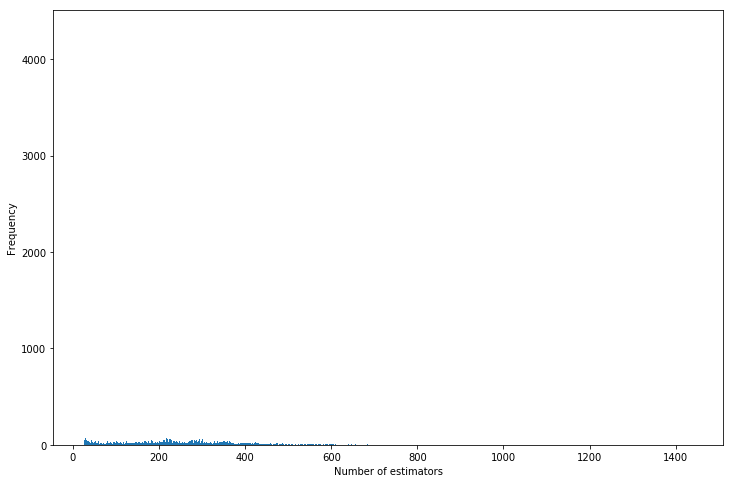

In [58]:
fig, ax = plt.subplots()
clean_df.n_estimators.plot.hist(bins=1000, ax=ax, figsize=(12,8))
ax.set_xlabel('Number of estimators')
plt.show()

/home/tmo/work/batiskav/installs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


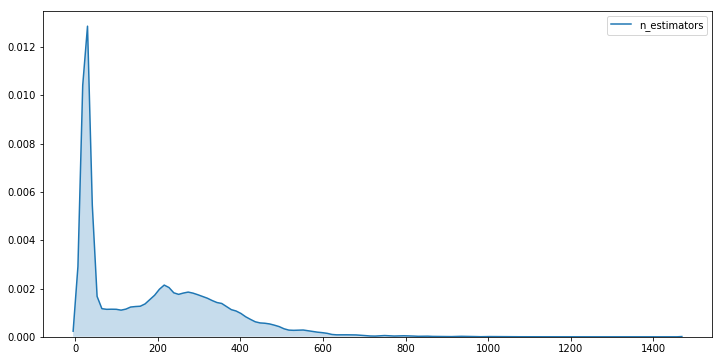

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(clean_df.n_estimators, bw=10, shade=True, ax=ax)
plt.savefig('macosko_n_estimators_kde.svg')
plt.show()

/home/tmo/work/batiskav/installs/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/tmo/work/batiskav/installs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


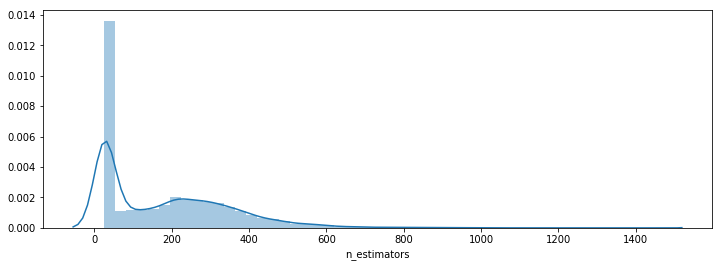

In [62]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.distplot(clean_df.n_estimators, ax=ax)
plt.savefig('macosko_n_estimators_distplot.svg')
plt.show()

/home/tmo/work/batiskav/installs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


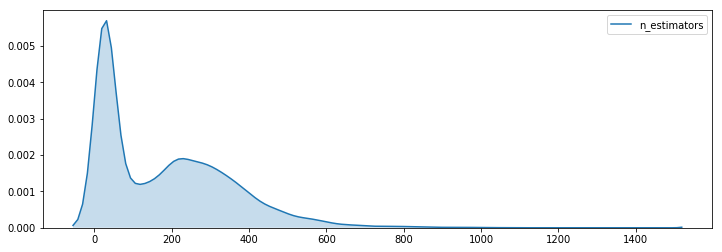

In [35]:
fig, ax = plt.subplots(figsize=(12,4))
sns.kdeplot(clean_df.n_estimators, shade=True, ax=ax)
plt.show()

In [13]:
clean_df.n_estimators.sum()

2366916

In [83]:
len(clean_df.n_estimators)

12934

In [84]:
clean_df.n_estimators.sum() / (len(clean_df.n_estimators) * 1000)

0.18299953610638628

In [ ]:
clean_df

In [45]:
nonzero_df = pd.DataFrame(macosko_df.astype(bool).sum(axis=0)).reset_index()
nonzero_df.columns = ['target', 'n_nonzero']
nonzero_df.head()

NameError: name 'macosko_df' is not defined

In [6]:
fig, ax = plt.subplots()
clean_df.n_estimators.plot.hist(bins=1000, ax=ax, figsize=(12,8))
ax.set_yscale('log')
ax.set_xlabel('Number of estimators')
plt.show()

NameError: name 'clean_df' is not defined

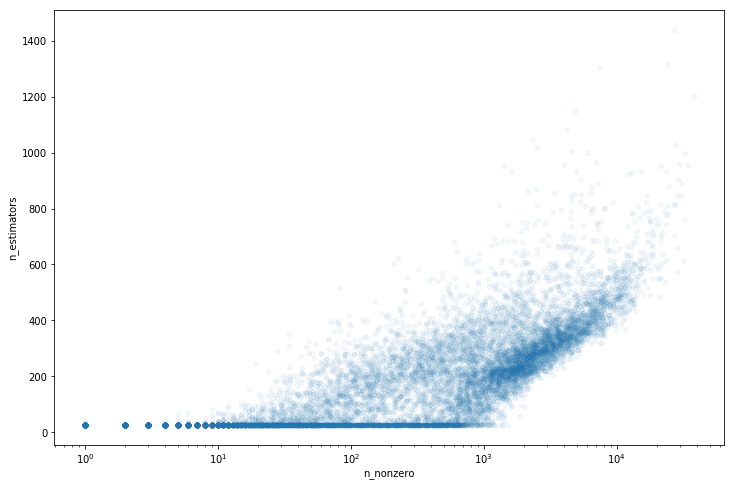

In [90]:
fig, ax = plt.subplots()
nonzero_df.merge(clean_df[['target', 'n_estimators']]).plot.scatter(ax=ax, x='n_nonzero', y='n_estimators', figsize=(12,8), alpha=.05)

ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

In [ ]:
nonzero_df